In [248]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [249]:
#Importing the Training Set
dataset_train = pd.read_csv("RNN.csv")
training_set = dataset_train.iloc[:, 1:2].values

In [250]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [251]:
#Create a data structure with 60 timestamps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [252]:
#Importing the Keras Libraries and Packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [253]:
#Initializing the RNN
regressor = Sequential()

In [254]:
#Adding the First LSTM Layer and some Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [255]:
#Adding the Second LSTM Layer and some Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [256]:
#Adding Third LSTM Layer and some Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [257]:
#Adding Fourth LSTM Layer and some Dropout Regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [258]:
#Adding the Output Layer
regressor.add(Dense(units = 1))

In [259]:
#Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [260]:
#Fitting the RNN into Training Set
regressor.fit(X_train,y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 84s 70ms/step - loss: 0.0079
Epoch 2/100
1198/1198 [==============================] - 41s 34ms/step - loss: 0.0013
Epoch 3/100
1198/1198 [==============================] - 37s 31ms/step - loss: 9.4016e-04
Epoch 4/100
1198/1198 [==============================] - 36s 30ms/step - loss: 8.7256e-04
Epoch 5/100
1198/1198 [==============================] - 39s 33ms/step - loss: 8.5096e-04
Epoch 6/100
1198/1198 [==============================] - 36s 30ms/step - loss: 7.7928e-04
Epoch 7/100
1198/1198 [==============================] - 36s 30ms/step - loss: 7.6101e-04
Epoch 8/100
1198/1198 [==============================] - 36s 30ms/step - loss: 7.2975e-04
Epoch 9/100
1198/1198 [==============================] - 36s 30ms/step - loss: 8.0281e-04
Epoch 10/100
1198/1198 [==============================] - 36s 30ms/step - loss: 8.3919e-04
Epoch 11/100
1198/1198 [==============================] - 37s 31ms/step - loss: 7.1987e-04
Epoch 12/100
119

In [261]:
#Load the Real Stock Price with dates 01/22/2019 - 8/20/2019
dataset_test = pd.read_csv("Test2.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [262]:
#Getting the Predicted Stock Price of 01/22/19 - 08/20/2019
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,200):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

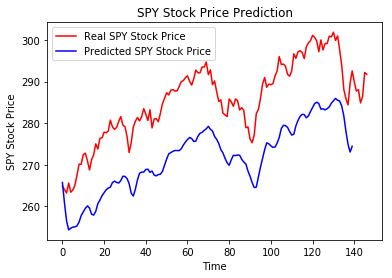

In [270]:
#Visualizing the Results
plt.plot(real_stock_price, color = 'red', label = 'Real SPY Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted SPY Stock Price')
plt.title('SPY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SPY Stock Price')
plt.legend()
plt.show()

In [272]:
rms=np.sqrt(np.mean(np.power((X_test),2)))
rms

# Y_Train RMSE = 0.2514148460253365 or MSE = 0.500999002
# X_Train RMSE = 0.2502799159568909 or MSE = 0.5
#X_Test RMSE = 0.9518191423835591 or MSE = 0.975704873

0.9518191423835591

Text(0, 0.5, 'SPY Stock Price')

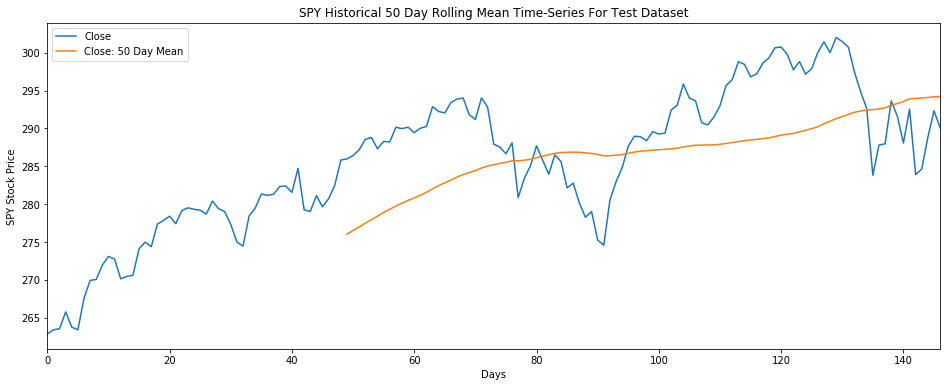

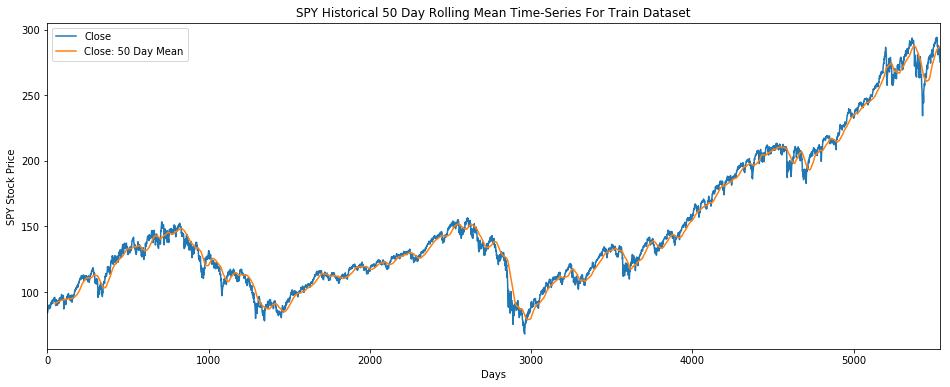

In [273]:
#General Historical Stock Data Visualization

dataset_test['Close: 50 Day Mean'] = dataset_test['Close'].rolling(window=50).mean()
dataset_test[['Close','Close: 50 Day Mean']].plot(figsize=(16,6))
plt.title('SPY Historical 50 Day Rolling Mean Time-Series For Test Dataset')
plt.xlabel("Days")
plt.ylabel("SPY Stock Price")

dataset_train['Close: 50 Day Mean'] = dataset_train['Close'].rolling(window=50).mean()
dataset_train[['Close','Close: 50 Day Mean']].plot(figsize=(16,6))
plt.title('SPY Historical 50 Day Rolling Mean Time-Series For Train Dataset')
plt.xlabel("Days")
plt.ylabel("SPY Stock Price")